# Build a model to predict the stock price

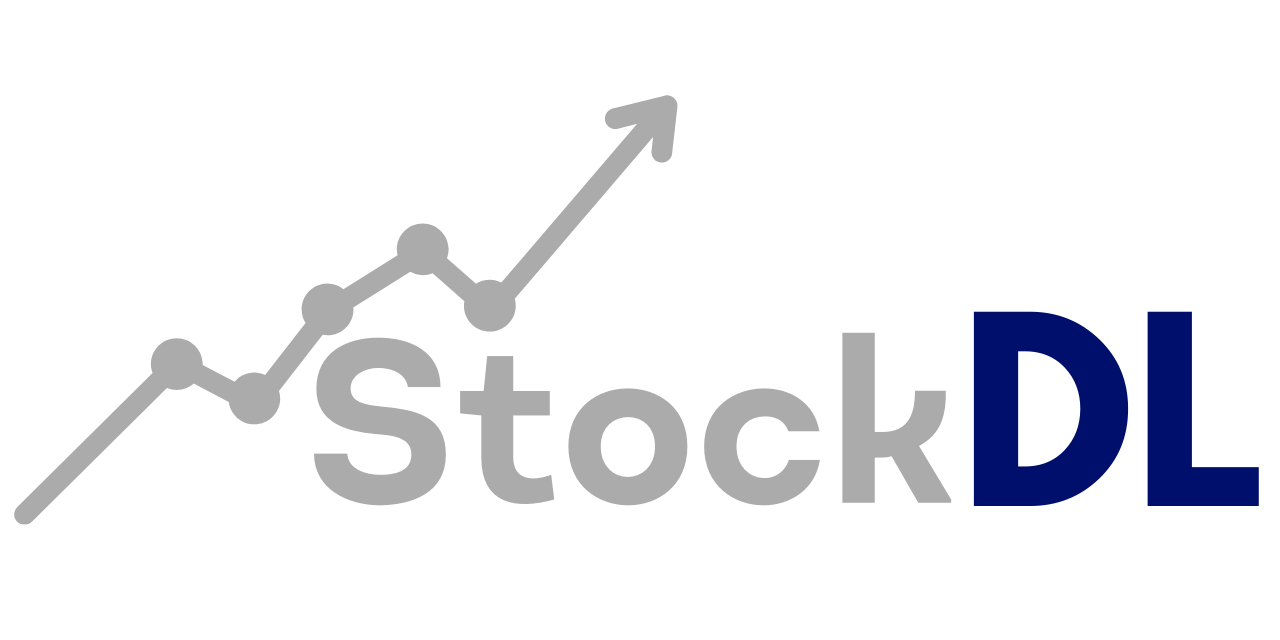

# Objective: -

Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another. Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence.

A stock market is a public market where you can buy and sell shares for publicly listed companies. The stocks, also known as equities, represent ownership in the company. The stock exchange is the mediator that allows the buying and selling of shares. 

Predicting the stock market is one of the most important applications of Machine Learning in finance.Stock price analysis has been a critical area of research and is one of the top applications of machine learning. This tutorial will teach you how to perform stock price prediction using machine learning and deep learning techniques. Here, you will use an LSTM network to train your model with Google stocks data. 



The ultimate goal is to predict stock prices using Machine Learning and the python programming language.

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.

In this stage we are going to read our problem dataset and have a look on it.

In [2]:
#loading the dataset
try:
    df = pd.read_csv('F:\ML models\stock prediction\Data\stocks.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [3]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

# Dataset: -

The dataset used in this model is publicly available at kaggle.

**Attribute Information:**
1. Close (closeing price of stock)

**Five real-valued features are computed:**

1. Date
2. Open (openning price of stock)
3. High (highest price of stock)
4. Low (lowest price of stock)
5. Volume

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [4]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 619040 rows and 7 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "close" column which says the value of stocks at closing.

In [5]:
df['close'].value_counts()

47.000    118
44.000    113
34.500    111
59.000    107
46.000    107
         ... 
66.965      1
72.635      1
72.385      1
75.545      1
29.318      1
Name: close, Length: 51151, dtype: int64

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [6]:
df.shape

(619040, 7)

#### The df.shape method shows the shape of the dataset. 

We can identify that out of the 757 rows and 6 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

We can identify that the close cloumn have continuous values. So, it is a regression problem.

In [8]:
df.iloc[1]

date      2013-02-11
open           14.89
high           15.01
low            14.26
close          14.46
volume       8882000
Name             AAL
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [9]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [10]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  2
There names are as follows:  ['date', 'Name']


In [11]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [12]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  1
There names are as follows:  ['volume']


In [13]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [14]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  4
There name are as follow:  ['open', 'high', 'low', 'close']


## Step 2 Insights: -

1) We have total 6 features where 2 are object type while others are float type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.


##### We identify that the 4 features open, high, low and close which represent the value of stock at different scenario.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [15]:
df.describe()

open           high            low          close  \
count  619029.000000  619032.000000  619032.000000  619040.000000   
mean       83.023334      83.778311      82.256096      83.043763   
std        97.378769      98.207519      96.507421      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.540000      94.410000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  6.190400e+05  
mean   4.321823e+06  
std    8.693610e+06  
min    0.000000e+00  
25%    1.070320e+06  
50%    2.082094e+06  
75%    4.284509e+06  
max    6.182376e+08

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical or float data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

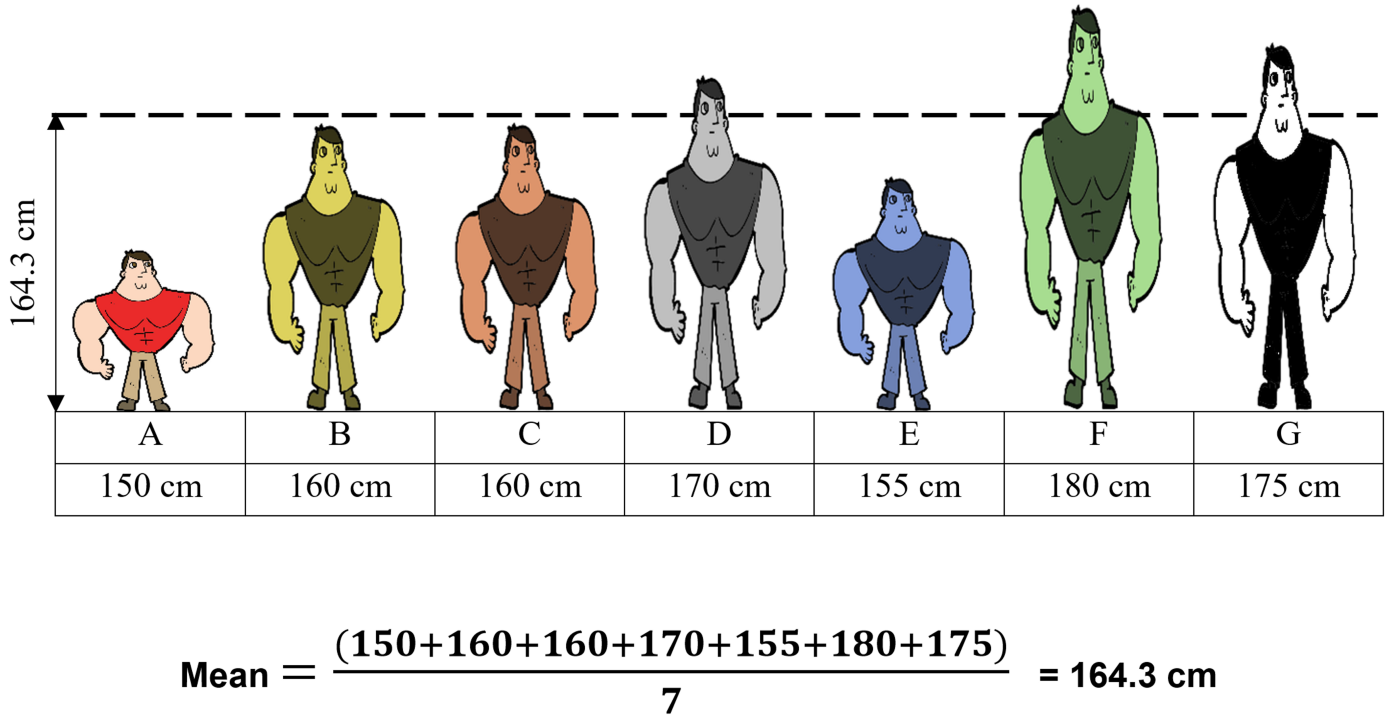

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


# 2.Median
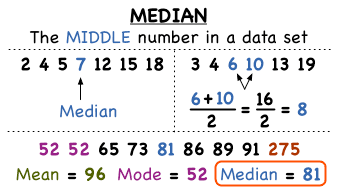

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.

# 3. Mode
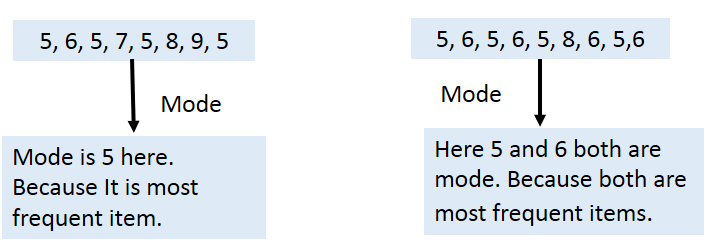
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

# Graphical representation of statistical analysis

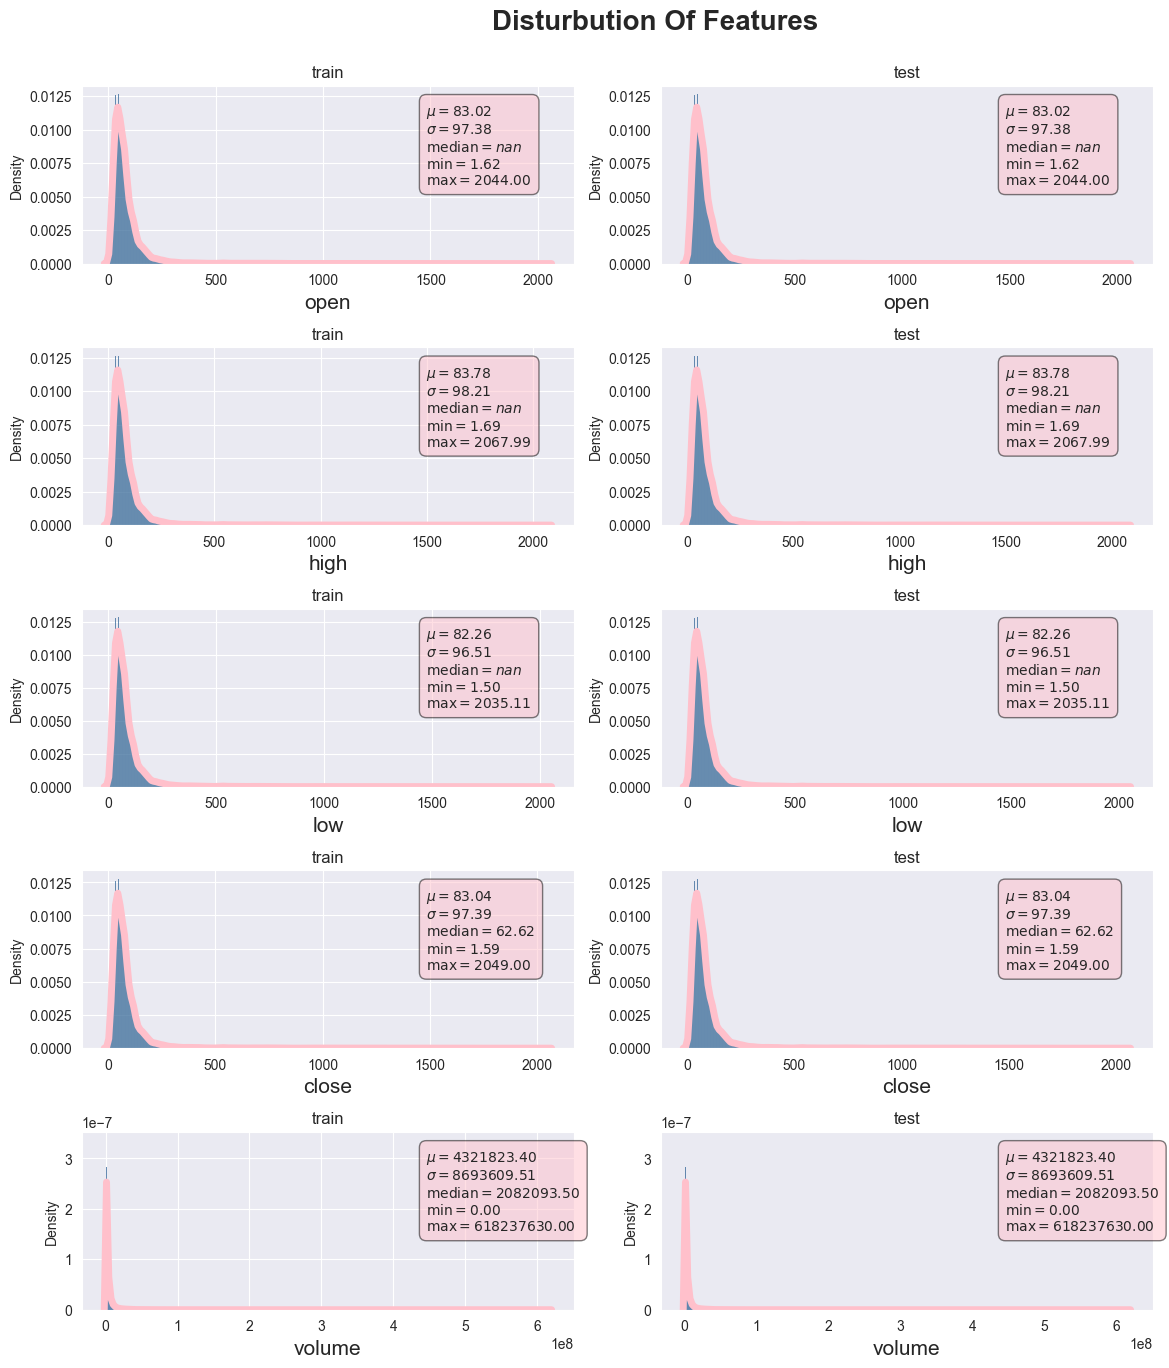

In [16]:
sns.set_style('darkgrid')
color = 'royalblue'

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(df.select_dtypes(include=['int64','float64']).columns)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('train')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    
    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('test')
    
    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, transform=ax.transAxes, fontsize=10, verticalalignment='top',bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    plt.grid()

plt.suptitle("Disturbution Of Features", y = 1, x = 0.55, size = 20,fontweight = "bold")
plt.tight_layout()
plt.show()

# Null and Nan values

1. **Null Values**


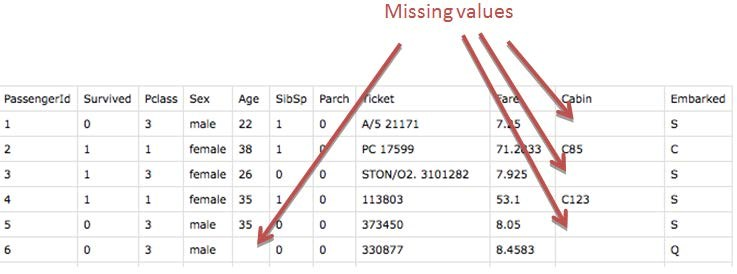

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [17]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

As we notice that there are some null values in our dataset.

2. **Nan Values**

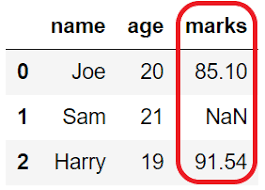

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [18]:
df.isna().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

As we notice that there are some nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

In [19]:
df.dropna(inplace=True)

# Count of unique occurences of every value in all categorical value



In [20]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

date       2018-02-07    505
2018-01-05    505
2018-01-03    505
2018-01-02    505
2017-12-29    505
             ... 
2013-04-04    476
2013-04-03    476
2013-04-02    476
2013-02-08    476
2013-04-26    472
Name: date, Length: 1259, dtype: int64
Name       AAL     1259
NOV     1259
NLSN    1259
NKE     1259
NI      1259
        ... 
DXC      215
BHGE     152
BHF      142
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64


- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [21]:
#Before Encoding
df['Name']

0         AAL
1         AAL
2         AAL
3         AAL
4         AAL
         ... 
619035    ZTS
619036    ZTS
619037    ZTS
619038    ZTS
619039    ZTS
Name: Name, Length: 619029, dtype: object

In [22]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Name = le.fit_transform(df.Name)

In [23]:
#After encoding or converting categorical col values into numbers
df['Name']

0           1
1           1
2           1
3           1
4           1
         ... 
619035    504
619036    504
619037    504
619038    504
619039    504
Name: Name, Length: 619029, dtype: int32

In [24]:
#Before Encoding
df['date']

0         2013-02-08
1         2013-02-11
2         2013-02-12
3         2013-02-13
4         2013-02-14
             ...    
619035    2018-02-01
619036    2018-02-02
619037    2018-02-05
619038    2018-02-06
619039    2018-02-07
Name: date, Length: 619029, dtype: object

In [25]:
#Encoding categorical data values
df.date = le.fit_transform(df.date)

In [26]:
#After encoding or converting categorical col values into numbers
df['date']

0            0
1            1
2            2
3            3
4            4
          ... 
619035    1254
619036    1255
619037    1256
619038    1257
619039    1258
Name: date, Length: 619029, dtype: int32

# Skewness 

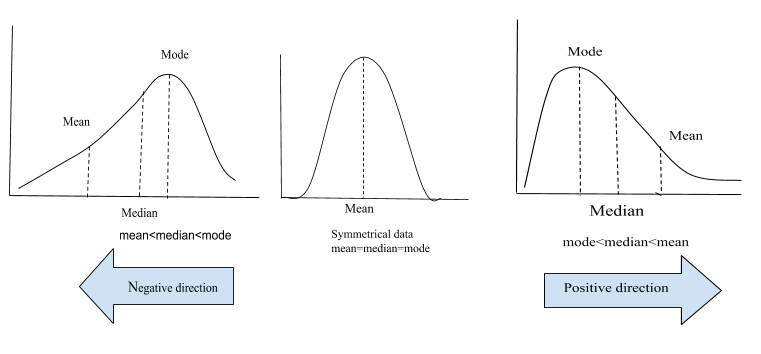

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [27]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [28]:
float64_lst_col = list(df.columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [29]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0    date         -0.0198  negative (-ve) skewed
1    open          7.6616  positive (+ve) skewed
2    high          7.6522  positive (+ve) skewed
3     low          7.6727  positive (+ve) skewed
4   close          7.6632  positive (+ve) skewed
5  volume         10.2823  positive (+ve) skewed
6    Name         -0.0164  negative (-ve) skewed

In [30]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                      5                   0                      2

We notice with the above results that we have following details:
1. 5 columns are positive skewed
2. 2 cloumns are negative skewed



In [31]:
df=np.power(df,1/3)

In [32]:
df.skew()

date     -0.893009
open      1.689139
high      1.692415
low       1.684944
close     1.688560
volume    1.848069
Name     -0.914415
dtype: float64

To transform the skewness we will use cube root transformation.

### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them, some of the columns are positively skewed while some are negative skewed. We have used cube root transformation to transform the skewness.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

### Why is Stock Market Prediction Important?

Some of the top advantages associated with the stock market prediction:- 

- Removes the Investment Bias.
- Develops the Habit of Complete Analysis.
- Minimizes Your Losses.
- Assures Consistency.
- Gives a Better Idea about Entry and Exit Points.
- Allows the Smart Way of Making Money.

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns
5. Scatter Plot to show the relation between variables
6. Jointplot

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

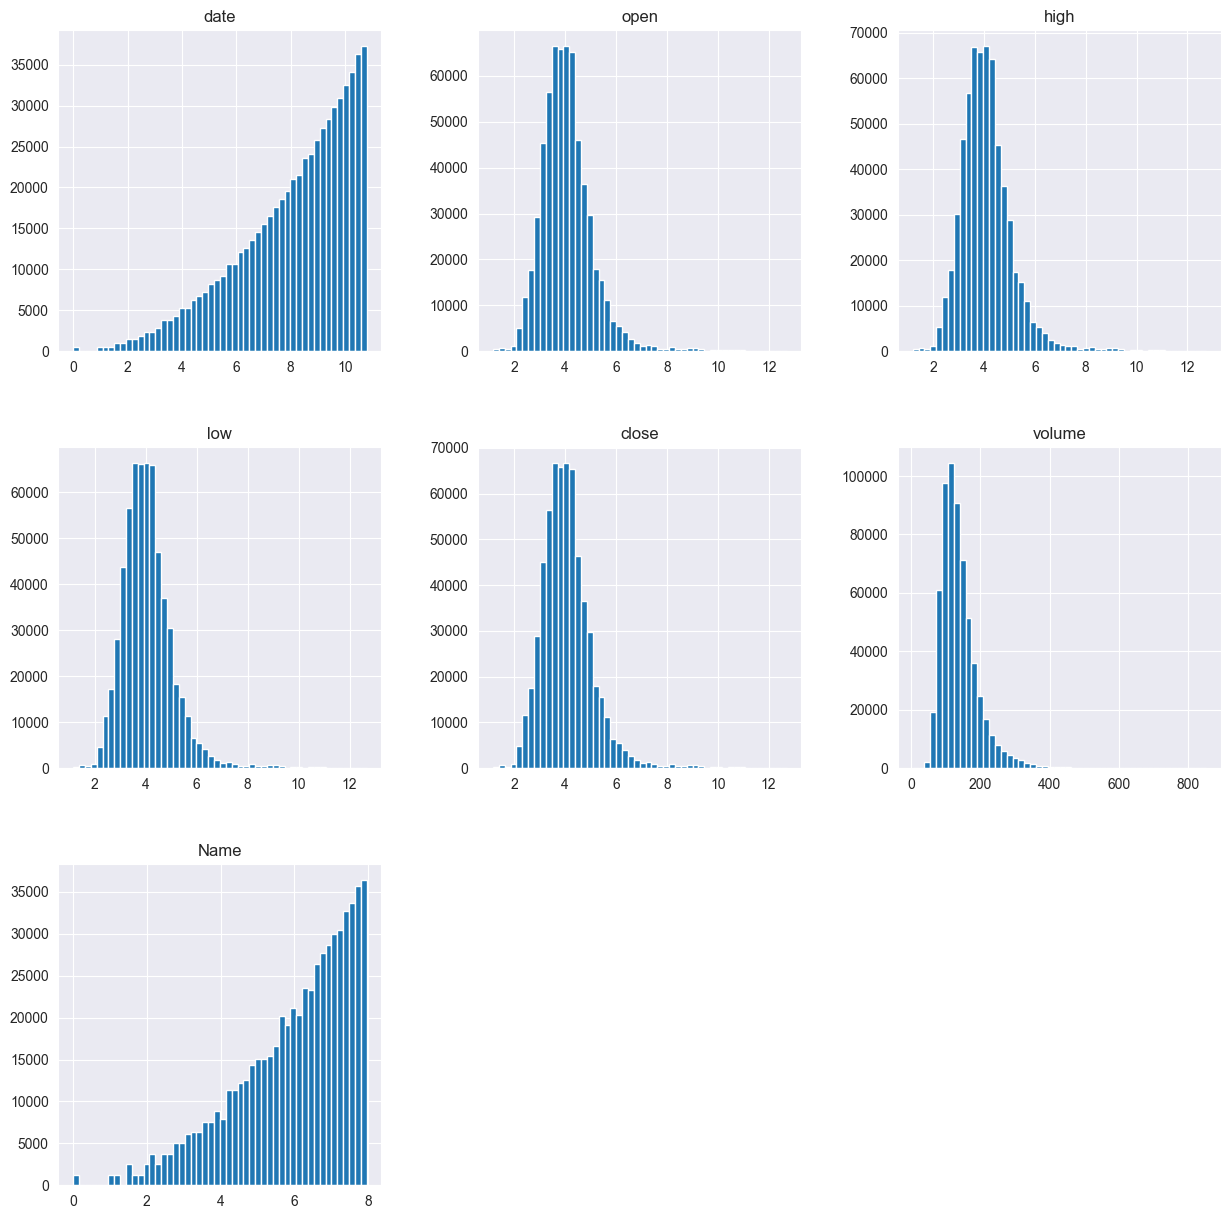

In [33]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,15))
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

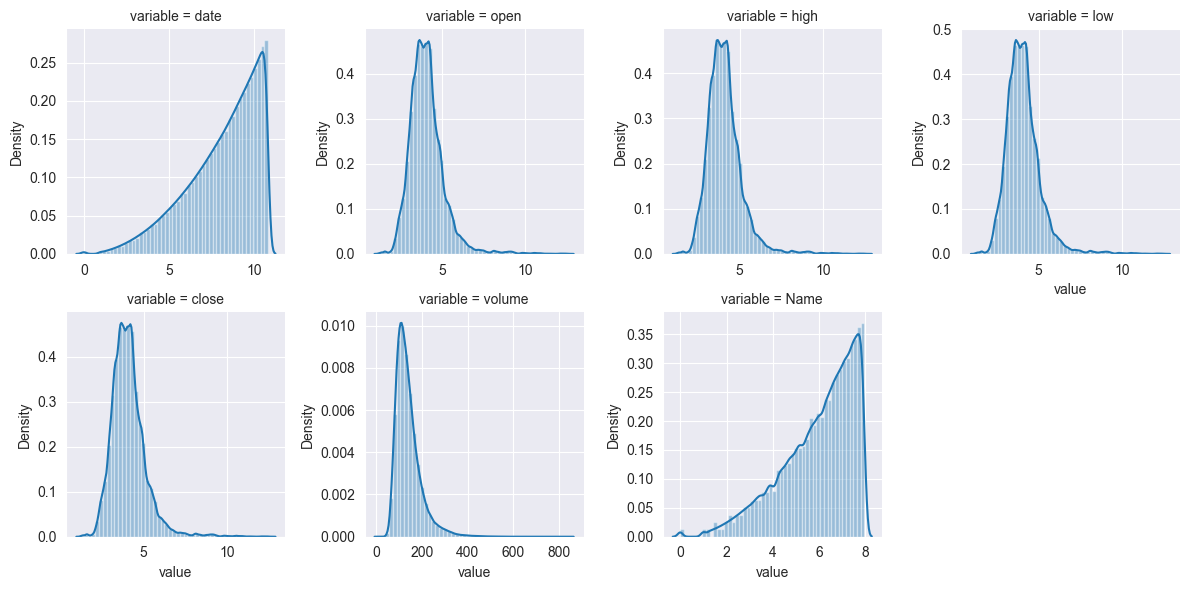

In [34]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [61]:
df.skew()

date     -0.893009
open      1.689139
high      1.692415
low       1.684944
close     1.688560
volume    1.848069
Name     -0.914415
dtype: float64

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 5 columns are positive skewed
2. 2 cloumns are negative skewed
2. 1 column is added here i.e close which is our target variable which is also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [62]:
#+ve skewed 
df['close'].skew()

1.6885597030239945

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



Text(0.5, 1.0, 'Correlation of stock return')

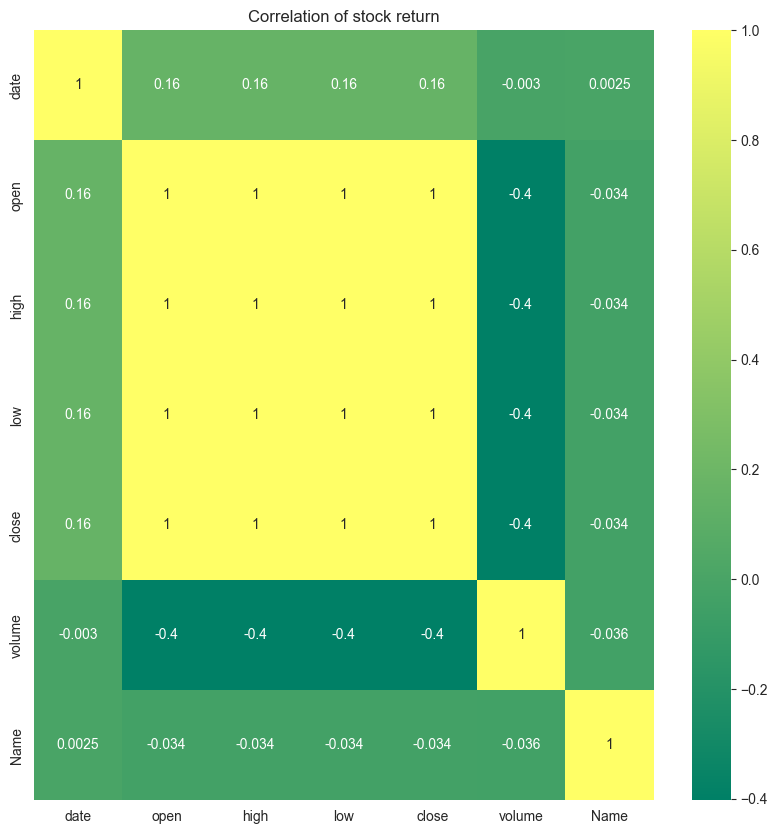

In [36]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

### Notice the last column from right side of this map. We can see the correlation of all variables against close. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [64]:
print (corr['close'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['close'].sort_values(ascending=False)[-5:]) #last 5 values`

close     1.000000
high      0.999926
low       0.999923
open      0.999852
volume    0.401119
date      0.156937
Name      0.034230
Name: close, dtype: float64 

----------------------
low       0.999923
open      0.999852
volume    0.401119
date      0.156937
Name      0.034230
Name: close, dtype: float64


Here we see that the low, high and open features are 99% correlated with the target variable.

In [65]:
corr

date      open      high       low     close    volume      Name
date    1.000000  0.157013  0.157148  0.156794  0.156937  0.002963  0.002510
open    0.157013  1.000000  0.999926  0.999915  0.999852  0.400904  0.034220
high    0.157148  0.999926  1.000000  0.999881  0.999926  0.399431  0.034301
low     0.156794  0.999915  0.999881  1.000000  0.999923  0.402660  0.034131
close   0.156937  0.999852  0.999926  0.999923  1.000000  0.401119  0.034230
volume  0.002963  0.400904  0.399431  0.402660  0.401119  1.000000  0.035942
Name    0.002510  0.034220  0.034301  0.034131  0.034230  0.035942  1.000000

### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

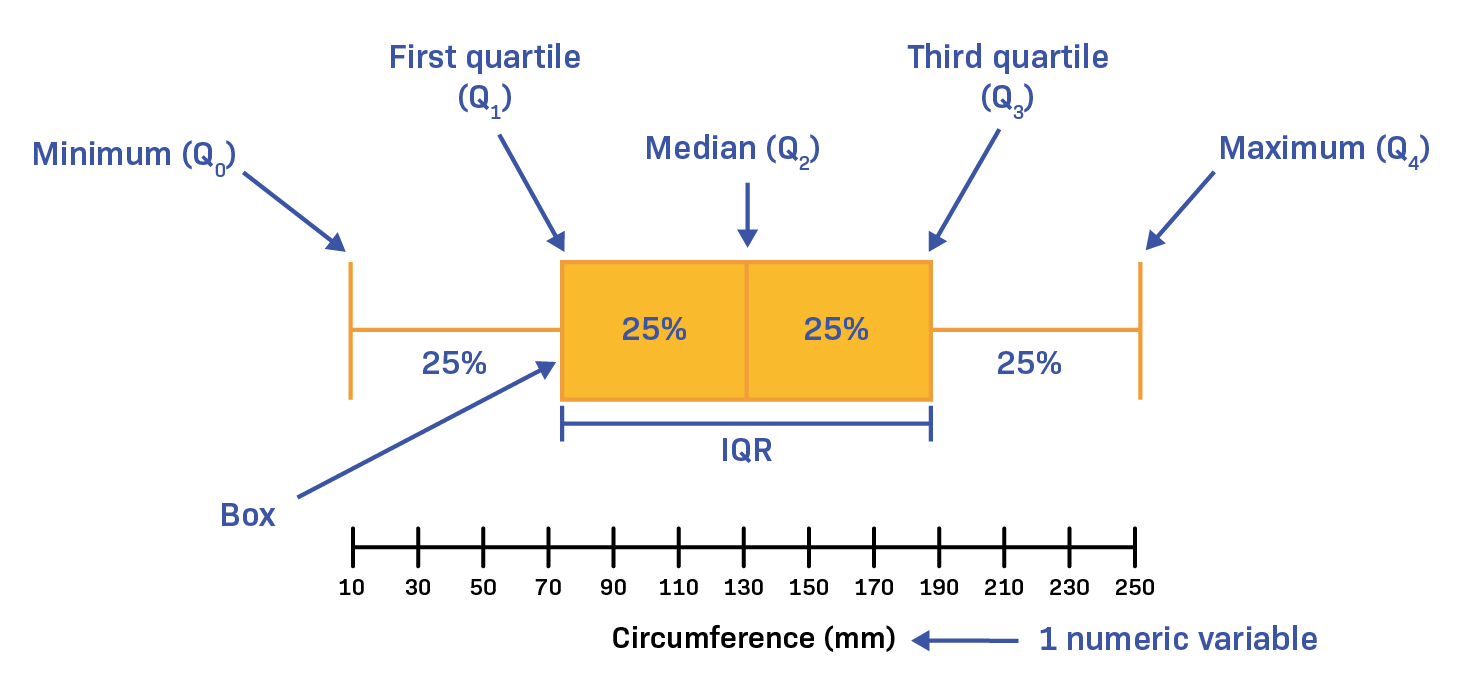

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [38]:
features = ['date','open','high','low','volume','Name']

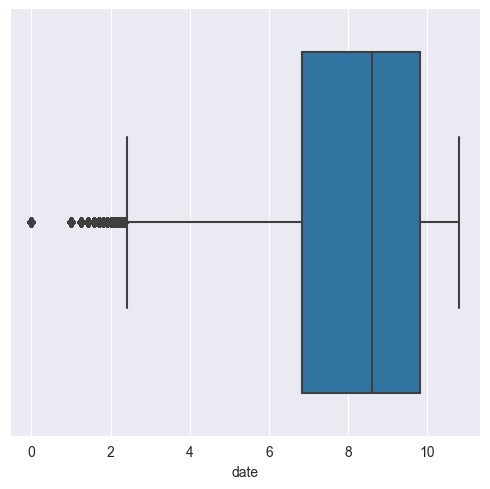

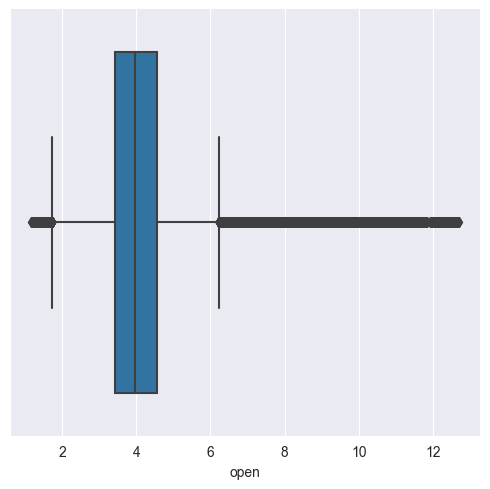

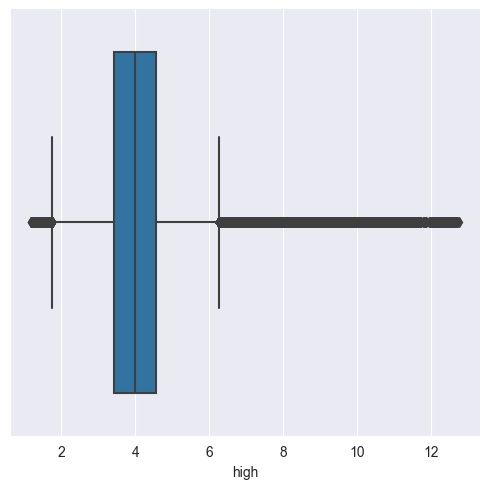

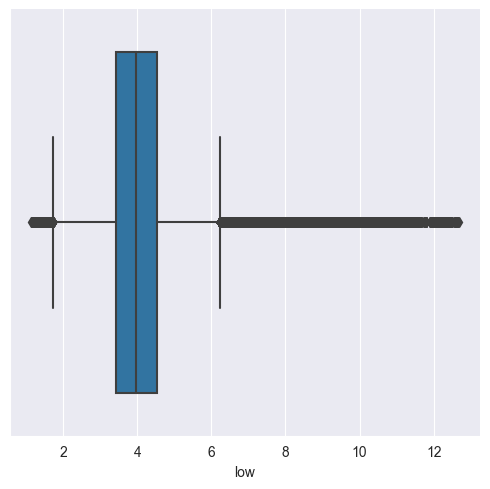

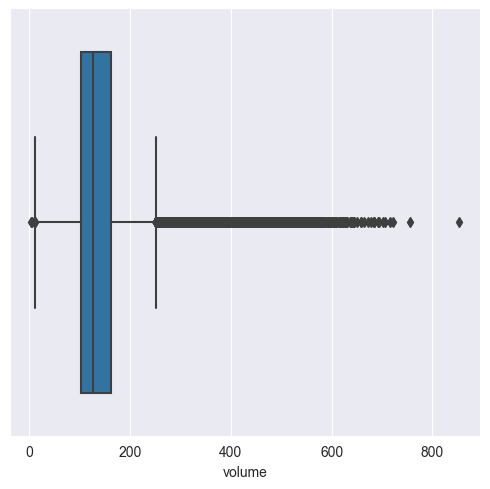

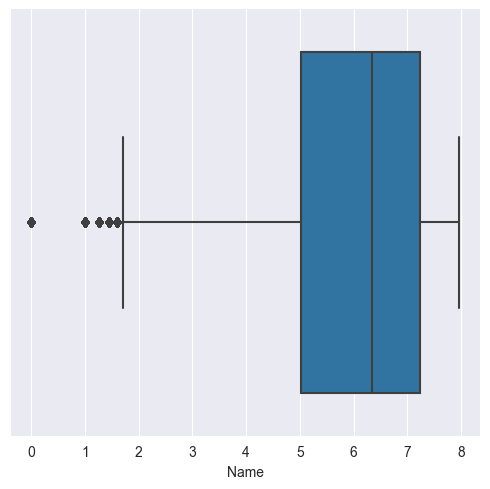

In [39]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

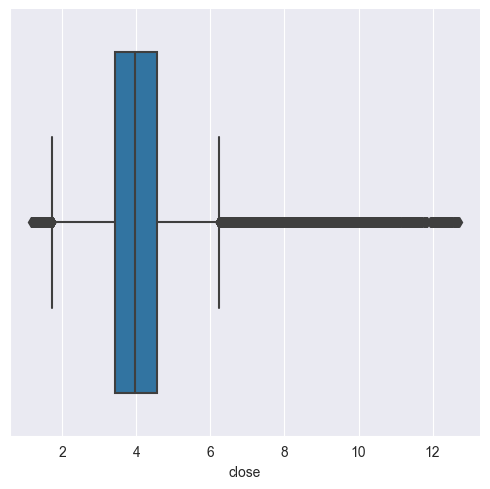

In [40]:
#for target variable
sns.catplot(data=df, x='close', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



# 5. Scatter Plot

Scatter plots are the graphs that present the relationship between two variables in a data-set. It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis. These plots are often called scatter graphs or scatter diagrams.

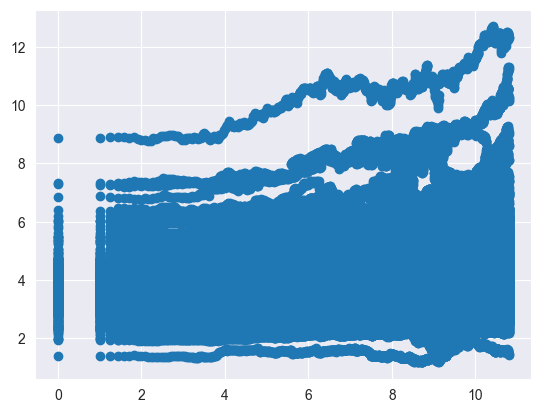

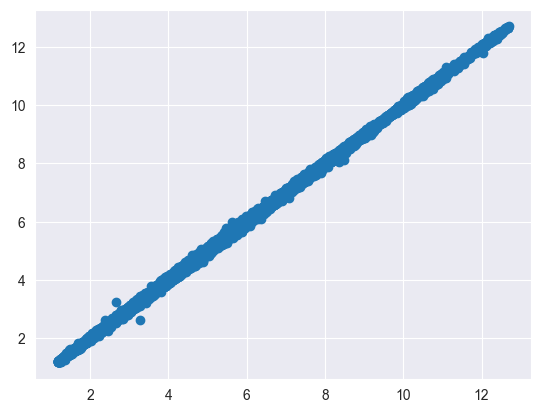

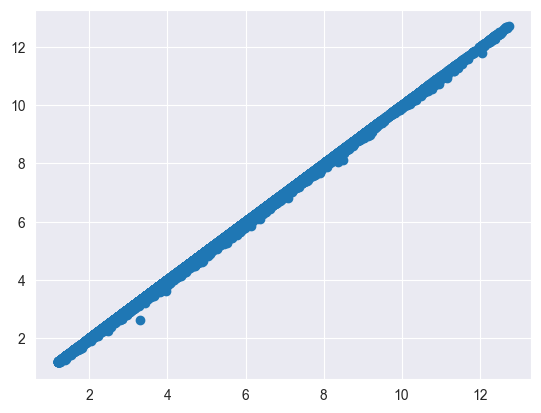

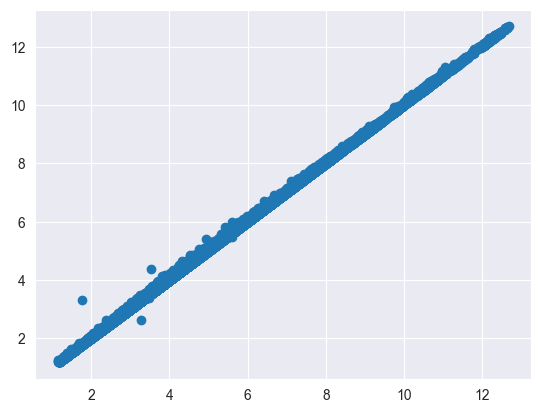

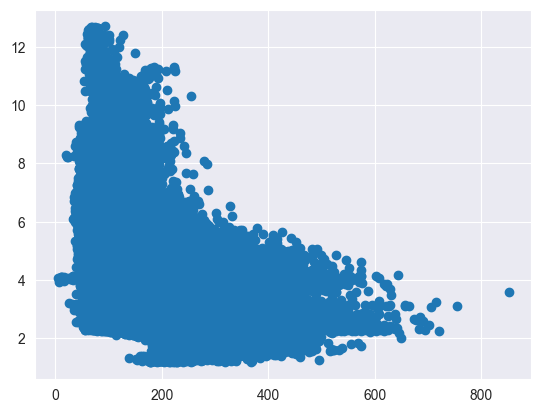

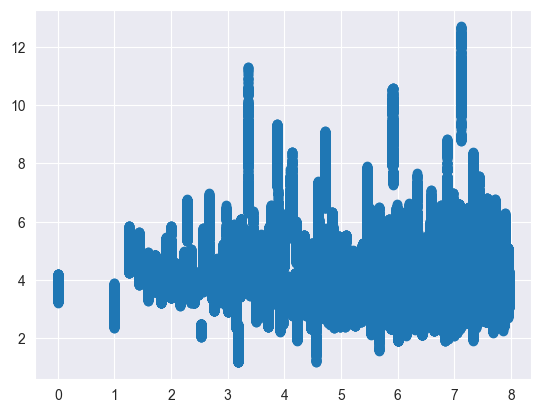

In [42]:
for value in features:
    figure = plt.scatter(data=df,x = value,y = 'close')
    plt.show()
    

The line between both th variables is called Best Fir Line.The least Sum of Squares of Errors is used as the cost function for Linear Regression. For all possible lines, calculate the sum of squares of errors. The line which has the least sum of squares of errors is the best fit line.The line drawn in a scatter plot, which is near to almost all the points in the plot is known as “line of best fit” or “trend line“.

### Scatter Plot insight:

We can observe that various variables like carwidth,curbweight,etc shows continous increase in price. Which relates that these variables are highly correlated with the target variables.

### Why use Scatter plot?

Scatter plots are used in either of the following situations.

When we have paired numerical data
When there are multiple values of the dependent variable for a unique value of an independent variable
In determining the relationship between variables in some scenarios, such as identifying potential root causes of problems, checking whether two products that appear to be related both occur with the exact cause and so on.

# 6. Jointplot 

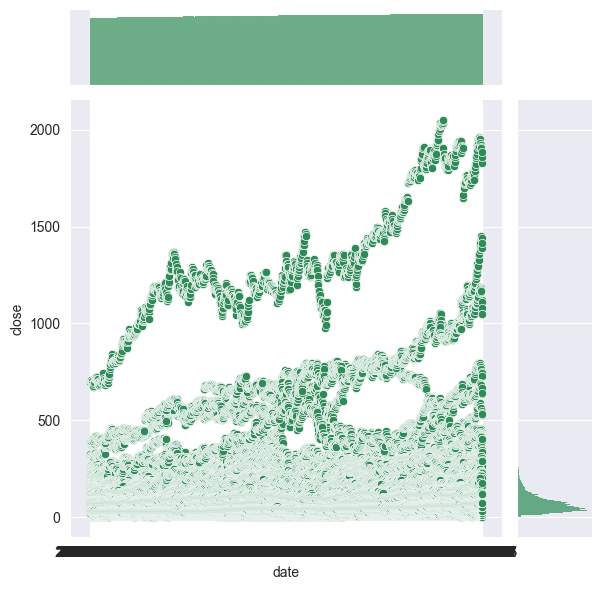

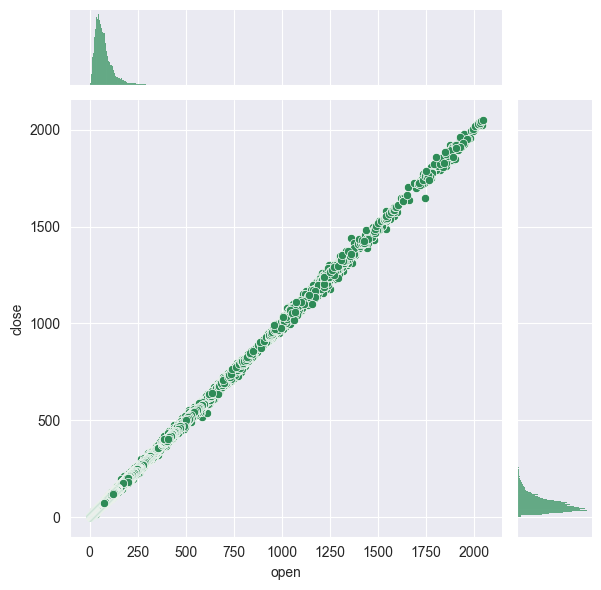

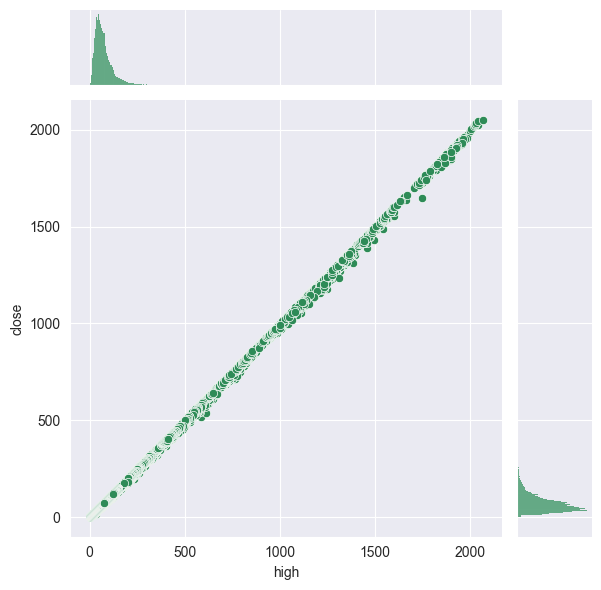

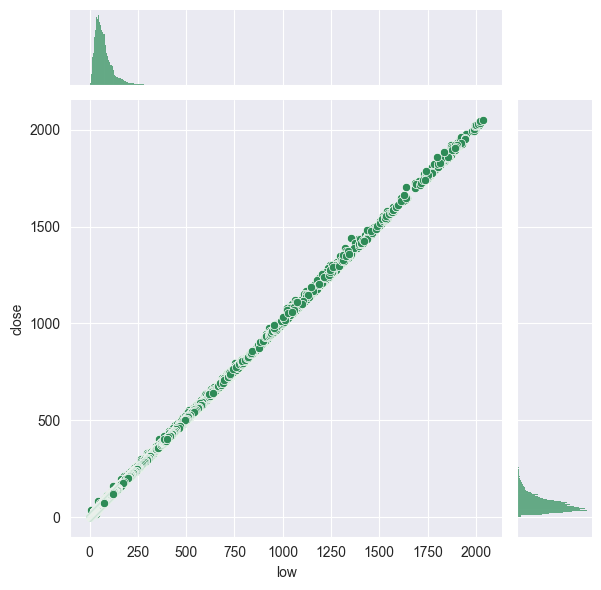

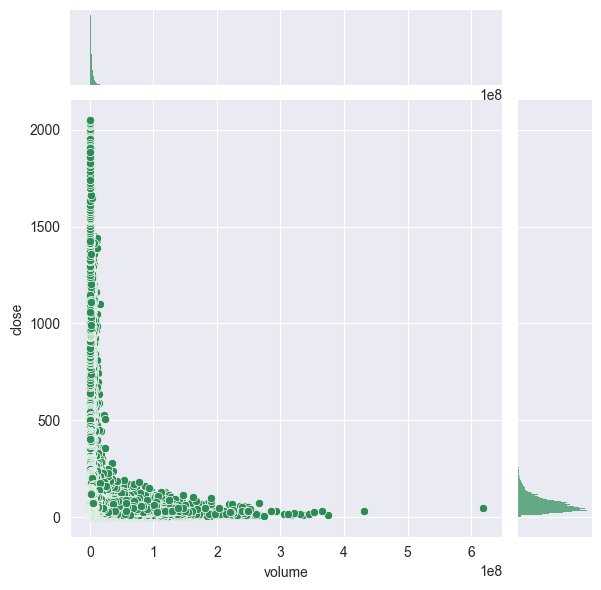

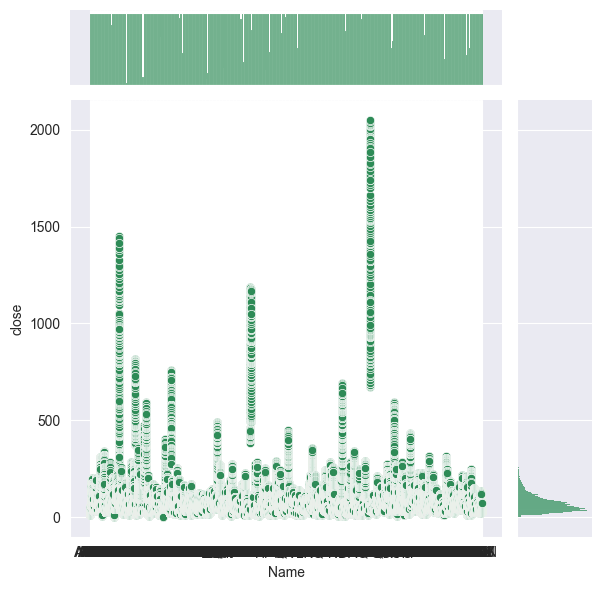

In [41]:
for i in features:
    sns.jointplot(x=i, y='close', data=df, kind='scatter', color='seagreen')

In the next step we will divide our cleaned data into training data and testing data.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [226]:
# Separate target and feature column in X and y variable
target = 'close'

# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

y have target variable and X have all other variable.

#### Here in stock price prediction, close is the target variable.

In [227]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  float64
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   volume  619029 non-null  float64
 5   Name    619029 non-null  float64
dtypes: float64(6)
memory usage: 33.1 MB


In [228]:
y

0         2.452434
1         2.436255
2         2.425537
3         2.447436
4         2.409568
            ...   
619035    4.269369
619036    4.250265
619037    4.195119
619038    4.184485
619039    4.195687
Name: close, Length: 619029, dtype: float64

In [229]:
# Check the shape of X and y variable
X.shape, y.shape

((619029, 6), (619029,))

In [230]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [231]:
# Again check the shape of X and y variable
X.shape, y.shape

((619029, 6), (619029, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [232]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((495223, 6), (123806, 6), (495223, 1), (123806, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different regression algorithms. As we know that our target variable is not discrete format so we have to apply regression algorithm. In our dataset we have the outcome variable or Dependent variable i.e Y having non discrete values. So we will use Regression algorithm.

__Algorithms we are going to use in this step__

1. Linear Regression
2. Lasso Regression
3. Ridge Regression

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [234]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Linear Regression

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables.

#### Train set cross-validation 

In [235]:
#Using Linear Regression Algorithm to the Training Set
from sklearn.linear_model import LinearRegression

log_R = LinearRegression() #Object Creation

log_R.fit(X_train, y_train)

LinearRegression()

In [236]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)


0.999938962097132

In [237]:
#Accuracy of test data
log_R.score(X_test, y_test) 

0.9999295065932079

In [238]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.00790521, 0.00792547, 0.00841792, 0.00802985, 0.00800537,
       0.00793798, 0.00808887, 0.00790921, 0.00860496, 0.00797079])

In [239]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

0.008079563535259206

### Prediction 

Now we will perform prediction on the dataset using Linear Regression.

In [240]:
# Predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

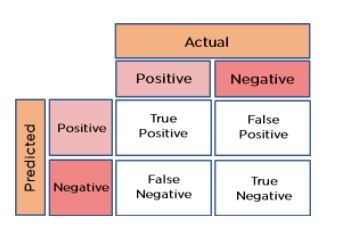

#### This diagram helps in understanding the concept of confusion matrix. 

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [241]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import r2_score  

li = r2_score(y_test, y_predicted)*100
print("The model used is Linear Regression")
print("R2 Score is: -")
print()
print(li)

The model used is Linear Regression
R2 Score is: -

99.99295065932078


# 2. Lasso Regression

Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation.

In [242]:
#Using Lasso Regression
from sklearn import linear_model
la = linear_model.Lasso(alpha=0.1)

In [243]:
#looking for training data
la.fit(X_train,y_train)

Lasso(alpha=0.1)

In [244]:
#Accuracy check of trainig data
la.score(X_train, y_train)

0.9896190200351695

### Prediction

In [245]:
# Predict the values on X_test_scaled dataset 
y_predicted=la.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [246]:
#Accuracy check of test data
lg = r2_score(y_test,y_predicted)*100
print("The model used is Lasso Regression")
print("R2 Score is: -")
print()
print(lg)

The model used is Lasso Regression
R2 Score is: -

98.95841345995493


# 3. Ridge Regression

Ridge regression is used when there are multiple variables that are highly correlated. It helps to prevent overfitting by penalizing the coefficients of the variables. Ridge regression reduces the overfitting by adding a penalty term to the error function that shrinks the size of the coefficients.

In [247]:
#Using Ridge Regression
from sklearn.linear_model import Ridge
ri = Ridge(alpha=1.0)

In [248]:
#looking for training data
ri.fit(X_train,y_train)

Ridge()

In [249]:
#Accuracy check of trainig data
ri.score(X_train, y_train)

0.9999389023126575

### Prediction

In [250]:
# Predict the values on X_test_scaled dataset 

y_predicted=ri.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [251]:
#Accuracy check of test data
rid = r2_score(y_test,y_predicted)*100
print("The model used is Ridge Regression")
print("R2 Score is: -")
print()
print(rid)

The model used is Ridge Regression
R2 Score is: -

99.99297001243792


# Insight: -

In [252]:
cal_metric=pd.DataFrame([li,lg,rid],columns=["Score in percentage"])
cal_metric.index=['Linear Regression',
                  'Lasso Regression',
                  'Ridge Regression']
cal_metric

Score in percentage
Linear Regression            99.992951
Lasso Regression             98.958413
Ridge Regression             99.992970


- As you can see with our Lasso Regression(0.9895 or 98.95%) we are getting a better result.
- So we gonna save our model with Lasso Regression Algorithm.

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [253]:
import pickle
pickle.dump(log_R , open('Stock_Prediction_li.pkl', 'wb'))
pickle.dump(la , open('Stock_Prediction_la.pkl', 'wb'))
pickle.dump(ri , open('Stock_Prediction_ri.pkl', 'wb'))

In [254]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('stock_prediction_li.pkl', 'rb'))
    Close = str(pickled_model.predict(features)[0][0])
    
    return str(f'The close is {Close}')

#### We can test our model by giving our own parameters or features to predict. 

In [255]:
df.head()

date      open      high       low     close      volume  Name
0  0.000000  2.470042  2.472771  2.445765  2.452434  203.339753   1.0
1  1.000000  2.460169  2.466760  2.424971  2.436255  207.095306   1.0
2  1.259921  2.435693  2.439060  2.415867  2.425537  201.044535   1.0
3  1.442250  2.427236  2.462919  2.424404  2.447436  217.291163   1.0
4  1.587401  2.462919  2.464018  2.360942  2.409568  317.082531   1.0

In [256]:
date=1.000000
openn=2.460169
high=2.466760
low=2.424971
volume=207.095306
Name=1.0

In [257]:
model_prediction([[date,openn,high,low,volume,Name]])

'The close is 2.438917916260364'

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps predicting the stock price. It helps the investor in identifying the stock to be invest. The accuracy for the prediction is 98.95%  and it signifies the accurate prediction of the stock.  